#### <img src="avocado.jpg" width=300 height=300 />

## Avocado price project ---Work in progress

🥑 Kaggle dataset https://www.kaggle.com/neuromusic/avocado-prices

<b>Description</b>
*copied from Kaggle page 

<b>Context</b><br>
It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

<b>Content</b><br>
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

<b>Acknowledgements</b><br>
Many thanks to the Hass Avocado Board for sharing this data!!

http://www.hassavocadoboard.com/retail/volume-and-price-data

Inspiration
In which cities can millenials have their avocado toast AND buy a home?

Was the Avocadopocalypse of 2017 real?

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [6]:
# Import data
raw_data = pd.read_csv('avocado.csv')
raw_data.drop(['Unnamed: 0'], axis=1,inplace = True)
raw_data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [5]:
raw_data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
# Convert data colum to pandas data format 
raw_data['Date_new'] = pd.to_datetime(raw_data['Date'])

In [19]:
# Split date into Year / Month / Day columns
raw_data['Y'], raw_data['M'],  raw_data['D'] = raw_data['Date'].str.split('-').str

/Users/ai.miyazawa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [20]:
raw_data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Y,M,D
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12,06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11,29


## Analyze data - data visualization <br>
<b>Categorical valuable:</b> Date, Type (Conventional or organic), region

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


In [17]:
# compare volumns of conventional vs organic 
print(raw_data['type'].value_counts())
# About the same volumns of data points available for conventional and organic avocados 

conventional    9126
organic         9123
Name: type, dtype: int64


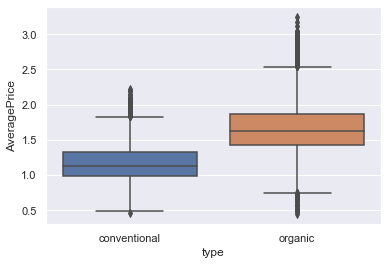

In [5]:
# compare prices for conventional vs organic 
sns.boxplot(x='type', y='AveragePrice', data=raw_data)
# average price difference: about $0.5

In [15]:
# Get all variables from regions 
print(raw_data['region'].value_counts())

RaleighGreensboro      338
CincinnatiDayton       338
Tampa                  338
Columbus               338
SanFrancisco           338
RichmondNorfolk        338
SanDiego               338
Seattle                338
Houston                338
BuffaloRochester       338
HarrisburgScranton     338
LosAngeles             338
Chicago                338
Midsouth               338
TotalUS                338
Orlando                338
Detroit                338
Charlotte              338
Albany                 338
West                   338
Denver                 338
NewOrleansMobile       338
Louisville             338
Southeast              338
Philadelphia           338
Boston                 338
SouthCarolina          338
DallasFtWorth          338
Plains                 338
StLouis                338
Nashville              338
Pittsburgh             338
SouthCentral           338
Syracuse               338
Sacramento             338
Roanoke                338
Atlanta                338
J

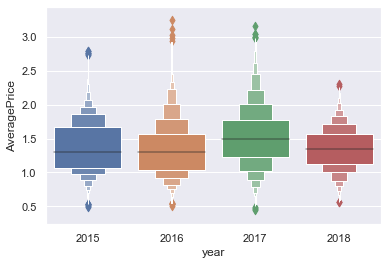

In [5]:
# Price differences over year? 
sns.boxenplot(x='year', y='AveragePrice', data=raw_data)

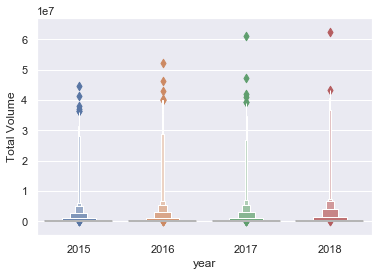

In [3]:
# Volume differences over year? 
sns.boxenplot(x='year', y='Total Volume', data=raw_data)

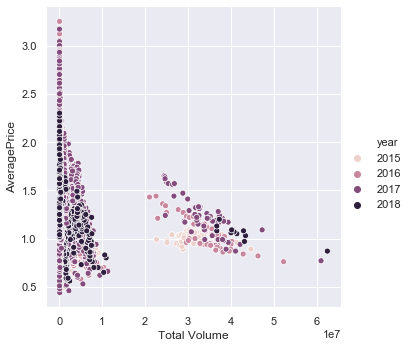

In [4]:
# Correlation with Price and Volumn?
sns.relplot(x='Total Volume', y='AveragePrice', hue ='year', data=raw_data)
# Looks like there are some corelations between 2-5 

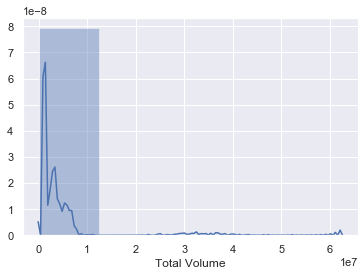

In [19]:
# Distribution of Total volume data points 
sns.distplot(raw_data['Total Volume'], bins=5)
# Concentrate in 0 - 1 

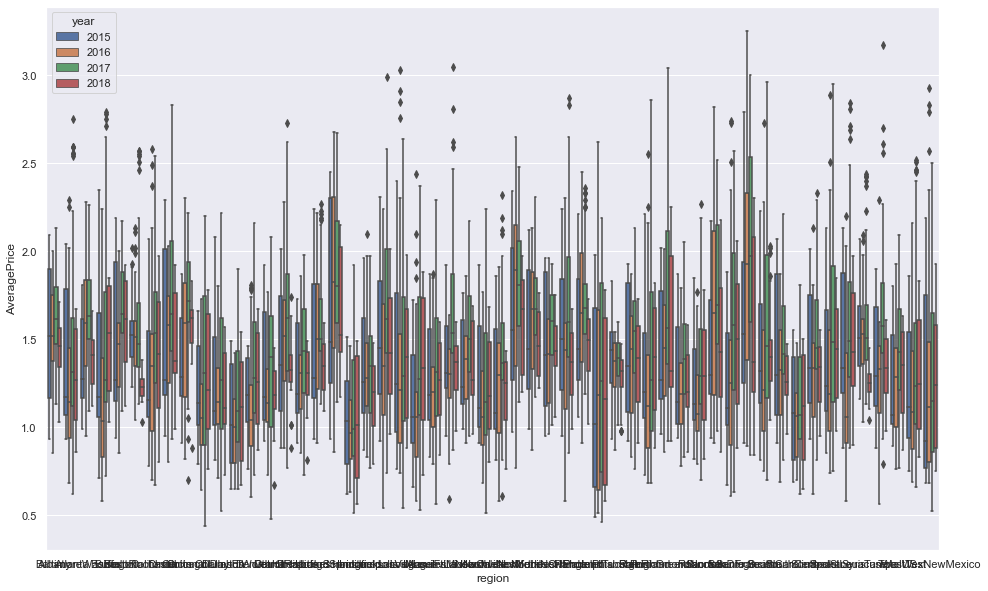

In [30]:
# Correlation with Price and Region?
plt.figure(figsize=(16,10))
sns.boxplot(x='region', y='AveragePrice', hue ='year', data=raw_data)
plt.show()
# Price different in years impacts more than the region feature

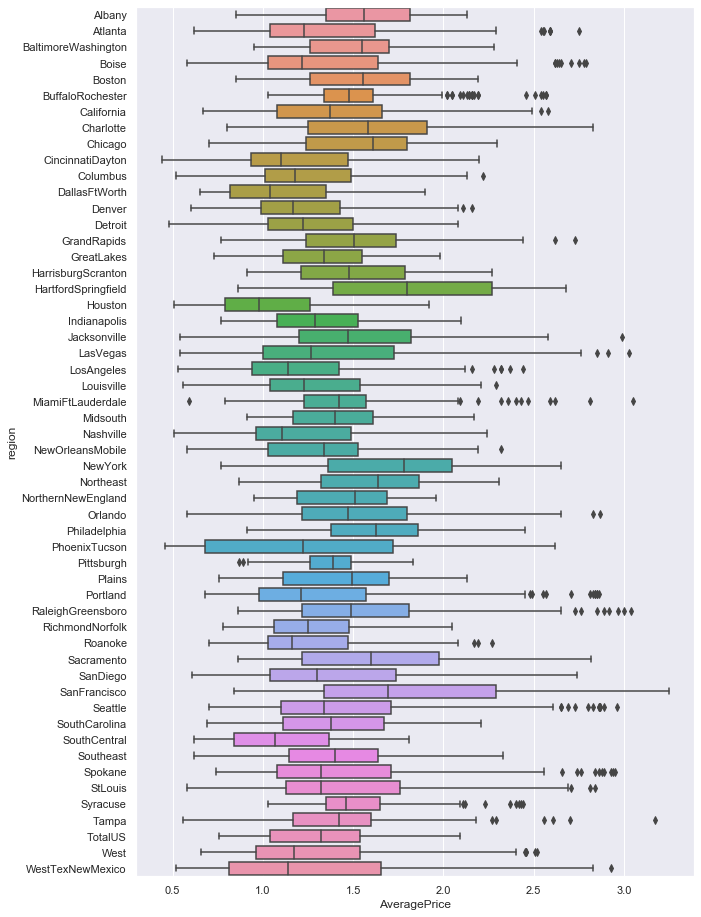

In [31]:
# Correlation with Price and Region?
plt.figure(figsize=(10,16))
sns.boxplot(x='AveragePrice', y='region', data=raw_data)
plt.show()
# Price different in years impacts more than the region feature

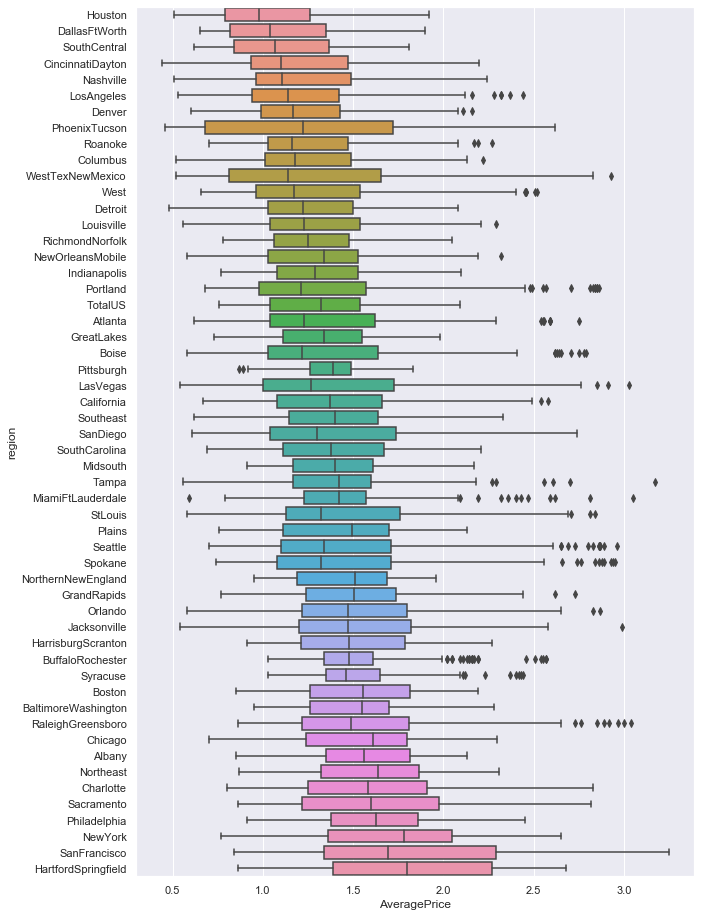

In [47]:
#Reorder regions by the mean
#reference - https://python-graph-gallery.com/35-control-order-of-boxplot/  https://datavizpyr.com/sort-boxplot-by-mean-with-seaborn-in-python/

# Find the order
my_order = raw_data.groupby(by=['region'])['AveragePrice'].mean().sort_values().index
 
# Give it to the boxplot
plt.figure(figsize=(10,16))
sns.boxplot(x='AveragePrice', y='region', data=raw_data, order=my_order)
plt.show()



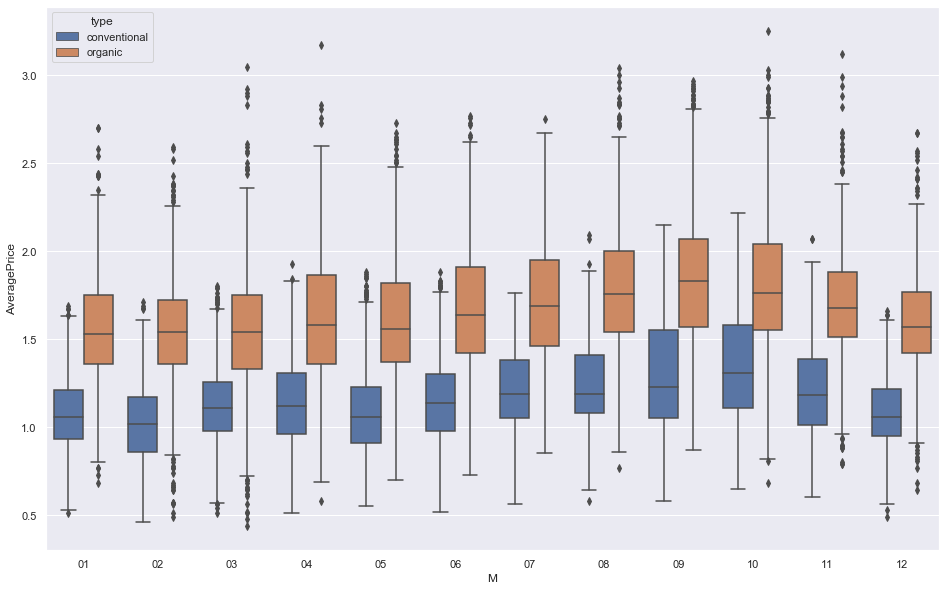

In [23]:
# Seasonality?
plt.figure(figsize=(16,10))
sns.boxplot(x="M", y="AveragePrice", hue='type', data=raw_data)
plt.show()